## Machine Learning Model for Predicting School Admissions from an Indian Perspective



### About this dataset

#### Context 
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content  
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )  
TOEFL Scores ( out of 120 )  
University Rating ( out of 5 )  
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
Undergraduate GPA ( out of 10 )  
Research Experience ( either 0 or 1 )  
Chance of Admit ( ranging from 0 to 1 )  

#### Acknowledgements  
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

#### Inspiration  
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Citation  
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [26]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Read dataset and display columns

In [27]:
admit_data = pd.read_csv("Admission_Predict.csv")
admit_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Examine basic statistics of the data

In [28]:
admit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


### Looking at the table above we see that we have 400 entries and no missing data

In [29]:
cols = admit_data.columns.tolist()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


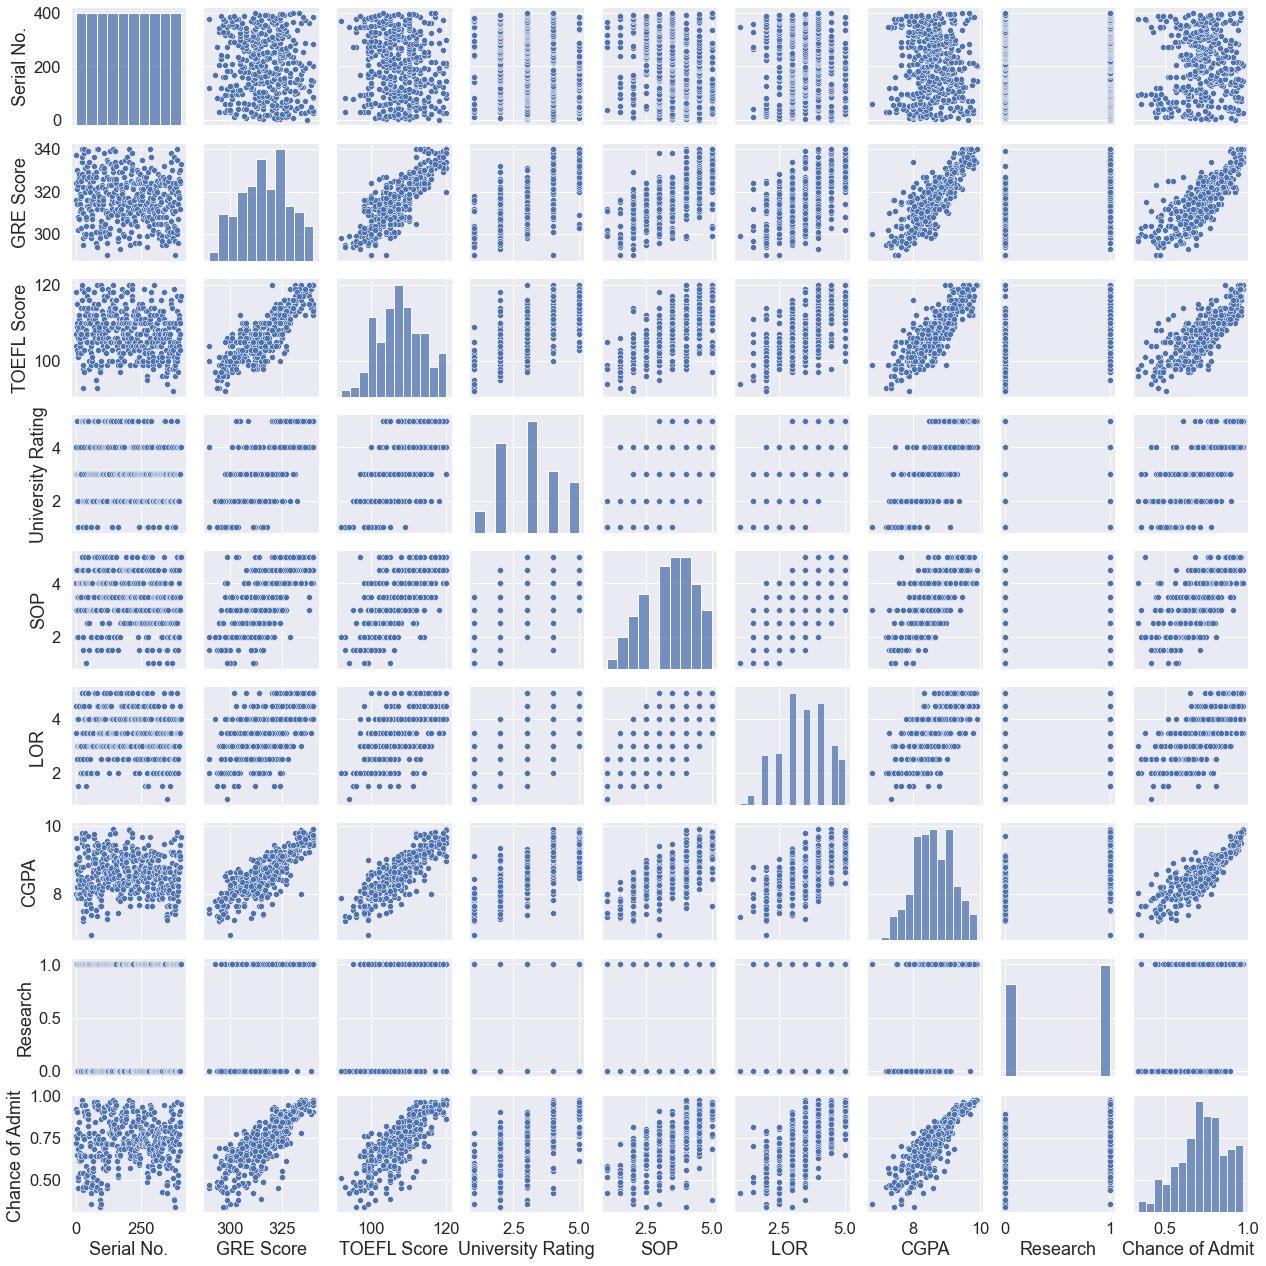

In [30]:
sns.pairplot(admit_data[cols], height=2.0)

# Observations for examination of statistics  

Looking at the Chance of Admission row we see a strong corelation between test scores, statement of purpose, and letter of recomendation, but less of a corelation with research experience.  

The histogram at the end of the row shows the typical chance of admission to be about 70% with more weight toward the higher chance of admission.  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with either standadization or normalization before our regression model is built.

#### Probablility Distribution of Admissions

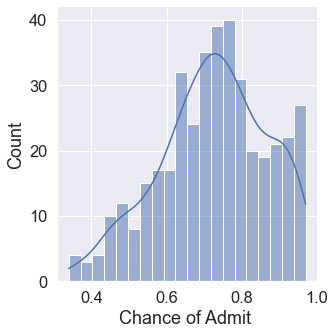

In [31]:
sns.displot(admit_data['Chance of Admit '], bins=20, kde=True)
plt.show()

#### Distribution  of School Ratings

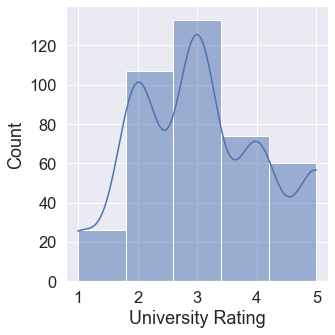

In [32]:
sns.displot(admit_data['University Rating'], bins=5, kde=True)
plt.show()

# Pandas Profiling Report for Data

In [33]:
profile = ProfileReport(admit_data, title="Pandas Profiling Report")
profile.to_widgets()

# Variable Selection for Predictive Modeling

## Calculation of covariance matrix

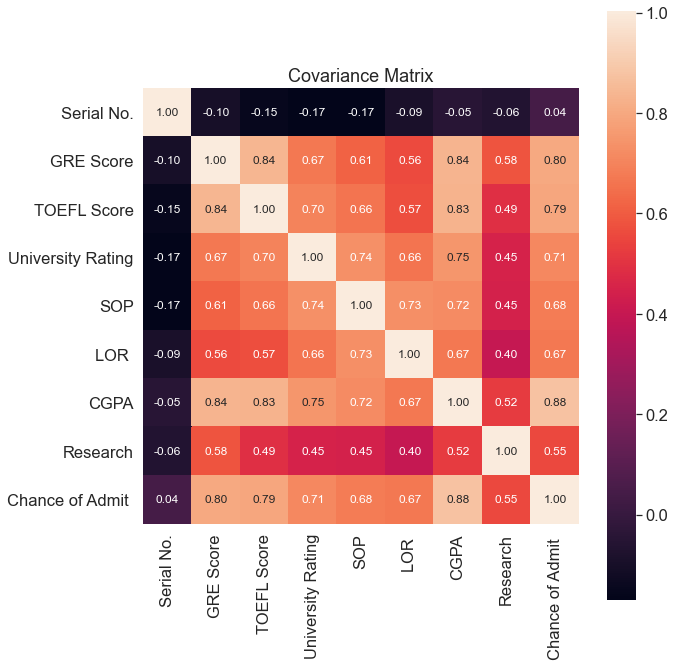

In [9]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(admit_data[cols].iloc[:,range(0,9)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Selecting Important Variables  

From the covariance matrix above we the the Admit variable correlats the strongest with the variables: CGPA, GRE Score and TOEFL Score, and less with the variables: University Rating, SOP and LOR.

In [36]:
cols_selected = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
admit_data[cols_selected].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [41]:
admit_data_X = admit_data[cols_selected].iloc[:,0:8].values     # Features Matrix
admit_data_y = admit_data[cols_selected]['Chance of Admit ']    # Target Variable

In [42]:
admit_data_X.shape

(400, 7)

In [43]:
admit_data_y.shape

(400,)

### Scaling the Data  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with standadization. This will center to the mean and scale to unit variance.

In [45]:
cols_scaled = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'] # Column names for scaled data

admit_X_scale = scale(admit_data_X)  # Scale the data

admit_X_scaled = pd.DataFrame(admit_X_scale, columns=cols_scaled) # Convert to dataframe

admit_X_scaled.head().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.76,1.75,0.80,1.09,1.17,1.76,1.37
1,0.63,-0.07,0.80,0.60,1.17,0.46,0.25
2,-0.07,-0.56,-0.08,-0.40,0.05,-1.01,-0.03
3,0.45,0.43,-0.08,0.10,-1.06,0.12,0.53
4,-0.24,-0.73,-0.95,-1.39,-0.50,-0.65,-0.52


#### Verify the scaling  

We can test to see that the scaling centered to the mean.

In [46]:
admit_X_scaled.mean().round(2)

GRE Score           -0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                 -0.0
CGPA                 0.0
Research            -0.0
dtype: float64

#### Check for Standard Deviation  

We'll perform a similar check using panda's std() method.

In [47]:
admit_X_scaled.std(ddof=0)

GRE Score            1.0
TOEFL Score          1.0
University Rating    1.0
SOP                  1.0
LOR                  1.0
CGPA                 1.0
Research             1.0
dtype: float64

#### Calculate the PCA Transformation  

Fit the PCA transfromation using the scaled data.

In [48]:
admit_pca = PCA().fit(admit_X_scaled)

Plot the cumulative variance ratio with number of components.

Text(0.5, 1.0, 'Cumulative Variance Ratio explained by PCA components')

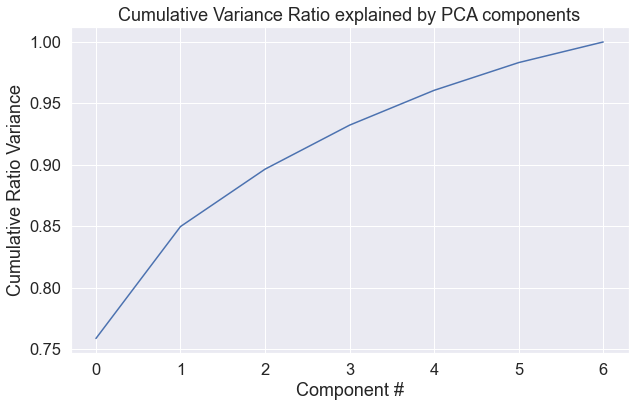

In [49]:
plt.subplots(figsize=(10,6))
plt.plot(admit_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio explained by PCA components')